In [40]:
from __future__ import print_function
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as pl

import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

%pylab inline


Populating the interactive namespace from numpy and matplotlib


using macrodata from statsmodels: macroeconomic dataset

In [41]:
print (sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

In [42]:
data = sm.datasets.macrodata.load_pandas().data

In [43]:
data.describe()


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1983.876847,2.492611,7221.171901,4825.293103,1012.863862,663.328640,5310.540887,105.075788,667.927586,5.311773,5.884729,239.724153,3.961330,1.336502
std,14.686817,1.118563,3214.956044,2313.346192,585.102267,140.863655,2423.515977,61.278878,455.346381,2.803071,1.458574,37.390450,3.253216,2.668799
min,1959.000000,1.000000,2710.349000,1707.400000,259.764000,460.400000,1886.900000,28.980000,139.600000,0.120000,3.400000,177.146000,-8.790000,-6.790000
25%,1971.000000,1.500000,4440.103500,2874.100000,519.147500,527.959500,3276.950000,41.050000,228.650000,3.515000,4.900000,208.631000,2.270000,-0.085000
50%,1984.000000,2.000000,6559.594000,4299.900000,896.210000,662.412000,4959.400000,104.100000,540.900000,5.010000,5.700000,236.348000,3.240000,1.340000
75%,1996.500000,3.000000,9629.346500,6398.150000,1436.681500,773.049000,6977.850000,159.650000,1102.100000,6.665000,6.800000,271.721500,4.975000,2.630000
max,2009.000000,4.000000,13415.266000,9363.600000,2264.721000,1044.088000,10077.500000,218.610000,1673.900000,15.330000,10.700000,308.013000,14.620000,10.950000


quarterly macroeconomic indicators 1959-2009


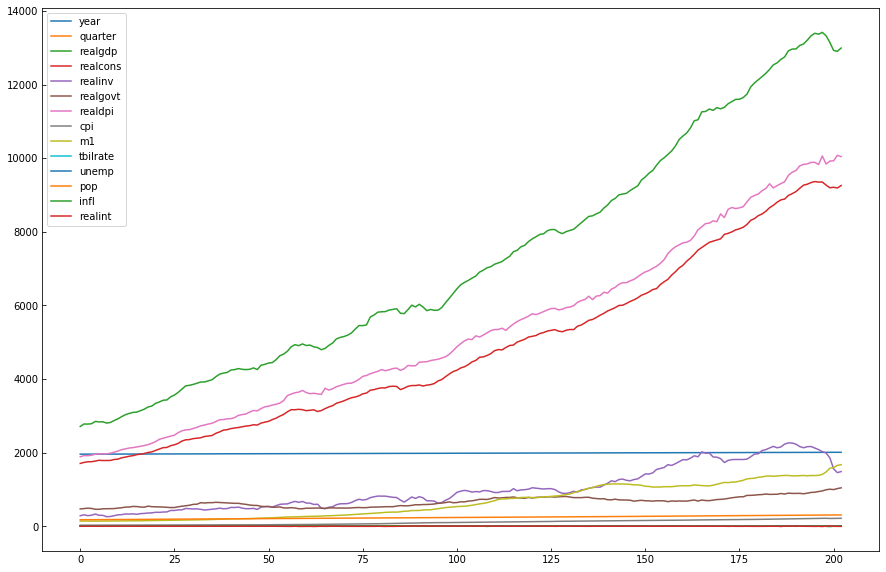

In [44]:
data.plot(figsize=(15,10))
print("quarterly macroeconomic indicators 1959-2009")

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


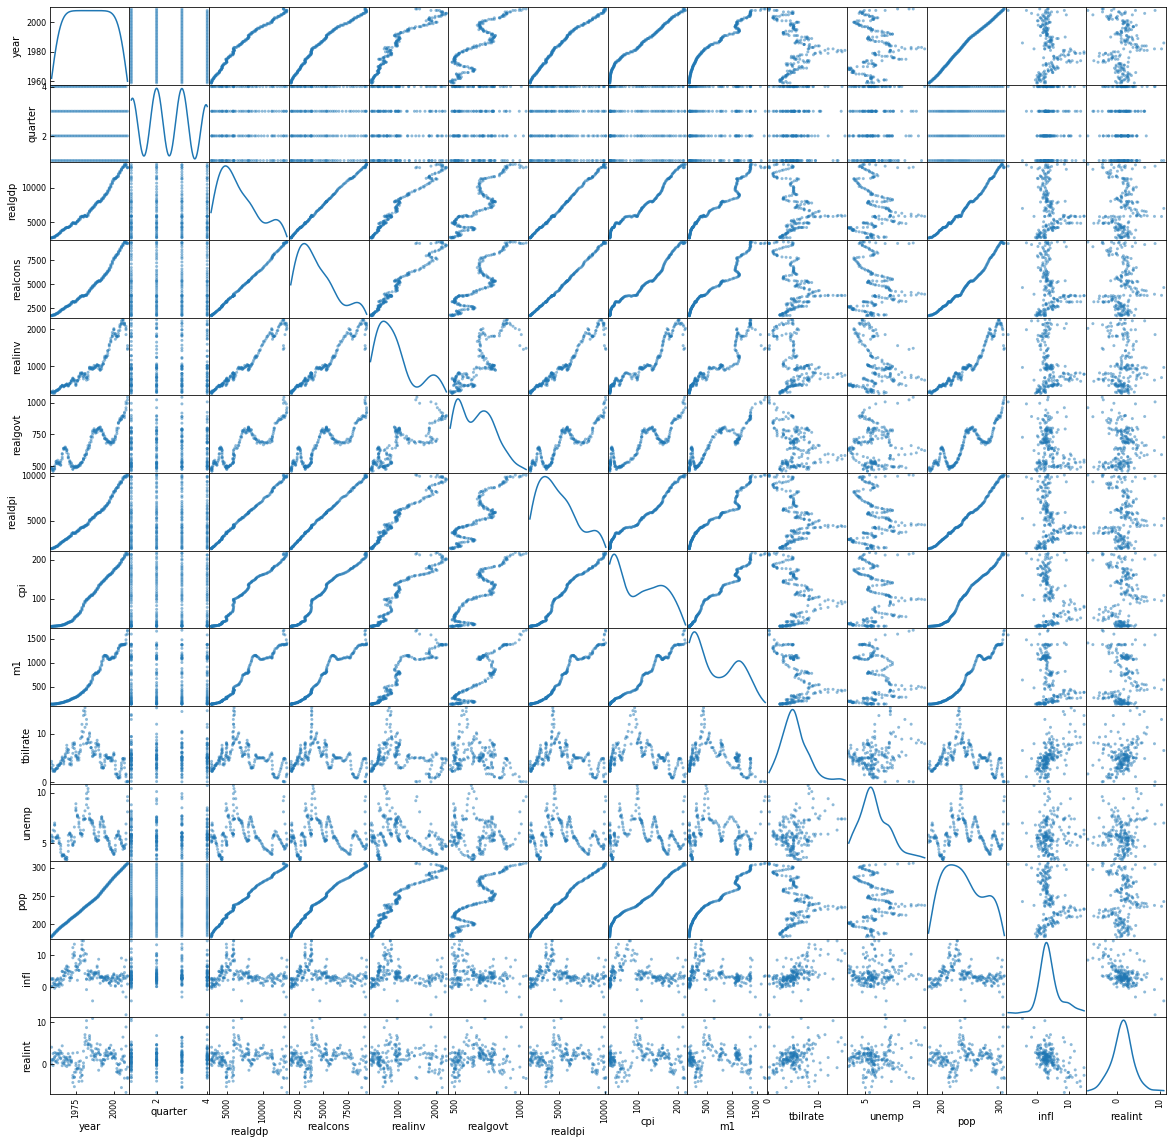

In [45]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20), diagonal="density");

     year  unemp
0  1959.0    5.8
1  1959.0    5.1
2  1959.0    5.3
3  1959.0    5.6
4  1960.0    5.2


,year,unemp
count,203.000000,203.000000
mean,1983.876847,5.884729
std,14.686817,1.458574
min,1959.000000,3.400000
25%,1971.000000,4.900000
50%,1984.000000,5.700000
75%,1996.500000,6.800000
max,2009.000000,10.700000


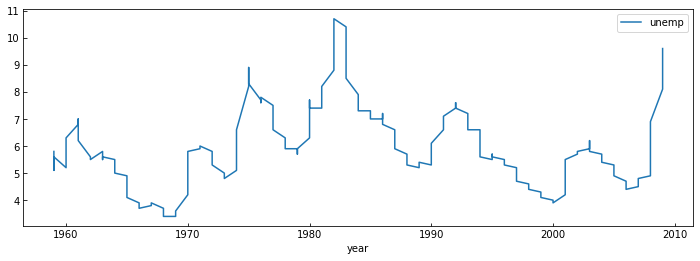

In [46]:
datadiff = data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()

### fix time axis

In [47]:
# add quarters as fraction of years 
data['year'] = data.year + data.quarter * 0.25

      year  unemp
0  1959.25    5.8
1  1959.50    5.1
2  1959.75    5.3
3  1960.00    5.6
4  1960.25    5.2


,year,unemp
count,203.000000,203.000000
mean,1984.500000,5.884729
std,14.686303,1.458574
min,1959.250000,3.400000
25%,1971.875000,4.900000
50%,1984.500000,5.700000
75%,1997.125000,6.800000
max,2009.750000,10.700000


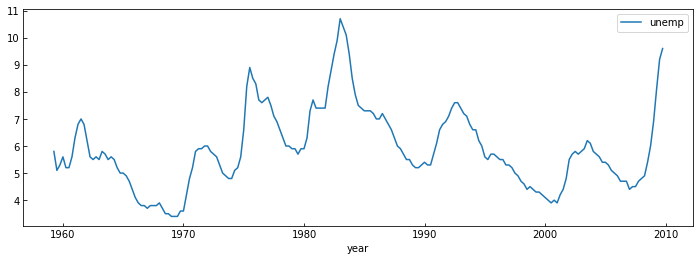

In [48]:
datadiff = data[['year', 'unemp']]
unemp = data.plot('year', 'unemp', figsize=(12,4));
print (datadiff.head())
datadiff.describe()

### alternative way, recreate time axis with date_from_range (this will be useful in the homework)

In [49]:
print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))

[datetime.datetime(1959, 3, 31, 0, 0), datetime.datetime(1959, 6, 30, 0, 0), datetime.datetime(1959, 9, 30, 0, 0), datetime.datetime(1959, 12, 31, 0, 0), datetime.datetime(1960, 3, 31, 0, 0), datetime.datetime(1960, 6, 30, 0, 0), datetime.datetime(1960, 9, 30, 0, 0), datetime.datetime(1960, 12, 31, 0, 0), datetime.datetime(1961, 3, 31, 0, 0), datetime.datetime(1961, 6, 30, 0, 0), datetime.datetime(1961, 9, 30, 0, 0), datetime.datetime(1961, 12, 31, 0, 0), datetime.datetime(1962, 3, 31, 0, 0), datetime.datetime(1962, 6, 30, 0, 0), datetime.datetime(1962, 9, 30, 0, 0), datetime.datetime(1962, 12, 31, 0, 0), datetime.datetime(1963, 3, 31, 0, 0), datetime.datetime(1963, 6, 30, 0, 0), datetime.datetime(1963, 9, 30, 0, 0), datetime.datetime(1963, 12, 31, 0, 0), datetime.datetime(1964, 3, 31, 0, 0), datetime.datetime(1964, 6, 30, 0, 0), datetime.datetime(1964, 9, 30, 0, 0), datetime.datetime(1964, 12, 31, 0, 0), datetime.datetime(1965, 3, 31, 0, 0), datetime.datetime(1965, 6, 30, 0, 0), datet

In [95]:
datadiff.head()
datadiff.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff['year']

KeyError: 'year'

In [96]:
datadiff.head()

,unemp
1959-03-31,5.8
1959-06-30,5.1
1959-09-30,5.3
1959-12-31,5.6
1960-03-31,5.2


# explore autocorrelation

In [97]:
sm.graphics.tsa.plot_acf?

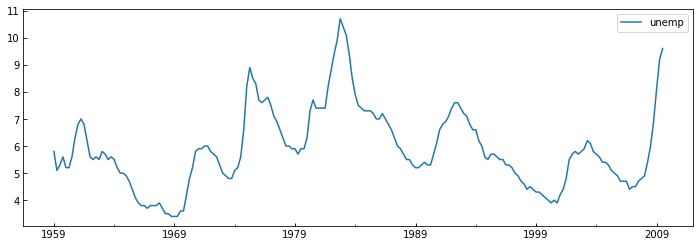

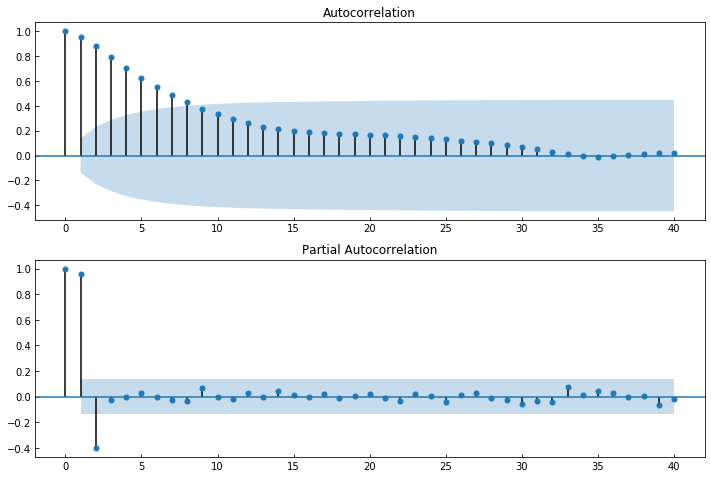

In [98]:
datadiff.plot(figsize=(12,4));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

#plotting autocorrelation at 40 lags
fig = sm.graphics.tsa.plot_acf(datadiff, lags=40, ax=ax1,
                              alpha=0.05)
ax2 = fig.add_subplot(212)

#plotting partial autocorrelation at 40 lags
fig = sm.graphics.tsa.plot_pacf(datadiff, lags=40, ax=ax2)

# explore stationarity

In [99]:
print ("P-value for unit root (stationarity)")
print("p-value: %.2f"%sm.tsa.adfuller(datadiff.unemp)[1])


P-value for unit root (stationarity)
p-value: 0.11


In [100]:
sm.tsa.ARMA?

order : iterable
    The (p,q) order of the model for the number of AR parameters,
    differences, and MA parameters to use.


# start with ARMA?

In [101]:
#creating a model with 
arma_mod31 = sm.tsa.ARMA(datadiff, (3,1)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod31.resid.values))

arma_mod31.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


residuals : dubrin_watson test 1.9838607502494643


//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(3, 1)   Log Likelihood                  -6.340
Method:                       css-mle   S.D. of innovations              0.245
Date:                Thu, 29 Nov 2018   AIC                             24.681
Time:                        08:29:49   BIC                             44.560
Sample:                    03-31-1959   HQIC                            32.723
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0790      0.417     14.580      0.000       5.262       6.896
ar.L1.unemp     0.7295      0.057     12.786      0.000       0.618       0.841
ar.L2.unemp     0.7953      0.054     14.718      0.000       0.689       0.901
ar.L3.unemp    -0.6057      0.058    -10.470      0.000      -0.719      -0.492
ma.L1.unemp     1.0000      0.015     68.567      0.000       0.971       1.029
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1105           -0.0000j            1.1105           -0.5000
AR.2            1.2117           -0.1360j            1.2193           -0.0178
AR.3            1.2117           +0.1360j            1.2193            0.0178
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

In [56]:
sm.stats.durbin_watson?


In [102]:
arma_mod51 = sm.tsa.ARMA(datadiff, (5,1)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod51.resid.values))
arma_mod51.summary()


//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


residuals : dubrin_watson test 1.9995859988181082


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(5, 1)   Log Likelihood                  -9.097
Method:                       css-mle   S.D. of innovations              0.250
Date:                Thu, 29 Nov 2018   AIC                             34.194
Time:                        08:29:54   BIC                             60.699
Sample:                    03-31-1959   HQIC                            44.917
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0858      0.446     13.631      0.000       5.211       6.961
ar.L1.unemp     1.4816      0.509      2.909      0.004       0.483       2.480
ar.L2.unemp    -0.4734      0.865     -0.547      0.585      -2.169       1.222
ar.L3.unemp     0.0192      0.447      0.043      0.966      -0.857       0.896
ar.L4.unemp    -0.1545      0.156     -0.993      0.322      -0.460       0.151
ar.L5.unemp     0.0805      0.080      1.000      0.318      -0.077       0.238
ma.L1.unemp     0.2157      0.508      0.425      0.671      -0.779       1.211
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1795           -1.6462j            2.0251           -0.3489
AR.2           -1.1795           +1.6462j            2.0251            0.3489
AR.3            1.1556           -0.0000j            1.1556           -0.0000
AR.4            1.5610           -0.4287j            1.6188           -0.0427
AR.5            1.5610           +0.4287j            1.6188            0.0427
MA.1           -4.6368           +0.0000j            4.6368            0.5000
-----------------------------------------------------------------------------
"""

In [103]:
arma_mod23 = sm.tsa.ARMA(datadiff, (2,3)).fit()
print ("residuals : dubrin_watson test",
       sm.stats.durbin_watson(arma_mod23.resid.values))
arma_mod23.summary()


//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


residuals : dubrin_watson test 1.984885845369205


//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 3)   Log Likelihood                  -8.251
Method:                       css-mle   S.D. of innovations              0.249
Date:                Thu, 29 Nov 2018   AIC                             30.502
Time:                        08:29:55   BIC                             53.695
Sample:                    03-31-1959   HQIC                            39.885
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.1022      0.477     12.795      0.000       5.167       7.037
ar.L1.unemp     1.1106      0.224      4.959      0.000       0.672       1.550
ar.L2.unemp    -0.1929      0.210     -0.919      0.359      -0.604       0.219
ma.L1.unemp     0.5805      0.209      2.776      0.006       0.171       0.990
ma.L2.unemp     0.3942      0.190      2.073      0.039       0.021       0.767
ma.L3.unemp     0.3507      0.157      2.235      0.027       0.043       0.658
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1173           +0.0000j            1.1173            0.0000
AR.2            4.6389           +0.0000j            4.6389            0.0000
MA.1           -1.3984           -0.0000j            1.3984           -0.5000
MA.2            0.1372           -1.4214j            1.4280           -0.2347
MA.3            0.1372           +1.4214j            1.4280            0.2347
-----------------------------------------------------------------------------
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


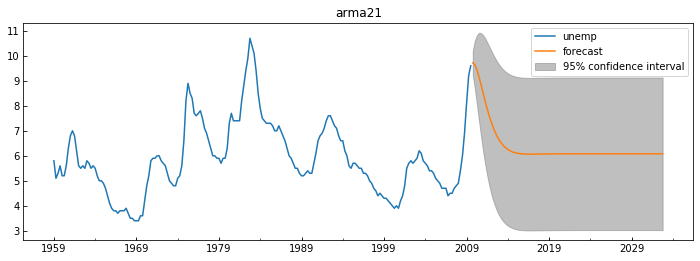

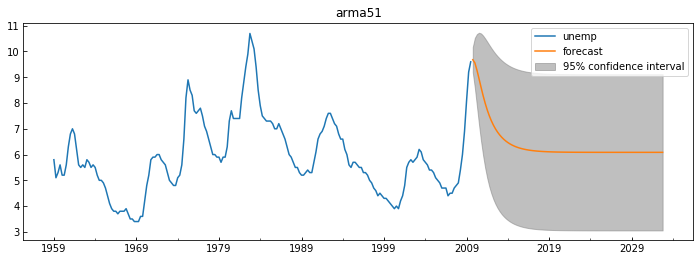

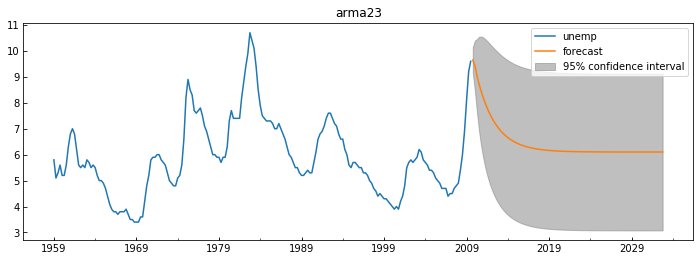

In [104]:
ax = datadiff.plot(figsize=(12,4));

arma_mod31.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma21");

ax = datadiff.plot(figsize=(12,4));
arma_mod51.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma51");

ax = datadiff.plot(figsize=(12,4));
arma_mod23.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("arma23");


# Removing trends by modelling them

,year,realgovt
count,203.000000,203.000000
mean,1984.500000,663.328640
std,14.686303,140.863655
min,1959.250000,460.400000
25%,1971.875000,527.959500
50%,1984.500000,662.412000
75%,1997.125000,773.049000
max,2009.750000,1044.088000


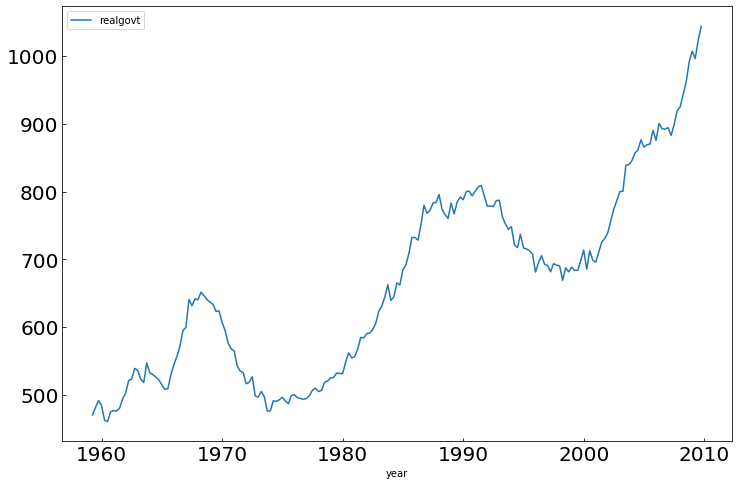

In [105]:
data = sm.datasets.macrodata.load_pandas().data


data['year'] = data.year + data.quarter * 0.25
datadiff2=data[['year', 'realgovt']]
ax = data.plot('year', 'realgovt', figsize=(12,8), fontsize=20);

#fit a line to the data
datadiff2.describe()

In [106]:
lf = sm.OLS(datadiff2['realgovt'], sm.add_constant(datadiff2['year'])).fit()
ax.plot(datadiff2['year'],lf.predict(), 'k-')
lf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               realgovt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     579.7
Date:                Thu, 29 Nov 2018   Prob (F-statistic):           3.88e-61
Time:                        08:30:06   Log-Likelihood:                -1154.2
No. Observations:                 203   AIC:                             2312.
Df Residuals:                     201   BIC:                             2319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.574e+04    681.241    -23.103      0.000   -1.71e+04   -1.44e+04
year           8.2651      0.343     24.077      0.000       7.588       8.942
==============================================================================
Omnibus:                       68.963   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.094
Skew:                           0.043   Prob(JB):                      0.00390
Kurtosis:                       1.858   Cond. No.                     2.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,year,realgovt,realgovt_stat
count,203.000000,203.000000,2.030000e+02
mean,1984.500000,663.328640,-5.772827e-12
std,14.686303,140.863655,7.147400e+01
min,1959.250000,460.400000,-1.082880e+02
25%,1971.875000,527.959500,-7.360733e+01
50%,1984.500000,662.412000,7.643611e+00
75%,1997.125000,773.049000,5.509427e+01
max,2009.750000,1044.088000,1.720654e+02


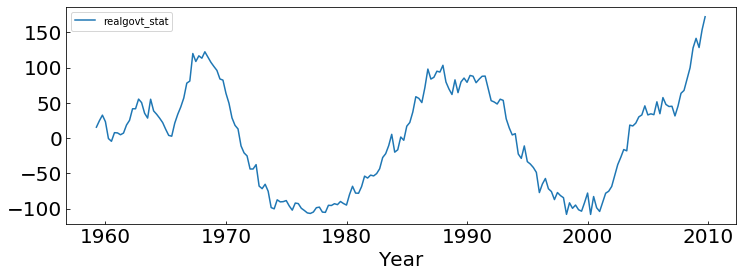

In [107]:
# remove the line fit model from the data: now it is stationary
datadiff2['realgovt_stat'] = (datadiff2.realgovt - lf.predict())
ax = datadiff2.plot('year', 'realgovt_stat', figsize=(12,4), fontsize=20)
ax.set_xlabel("Year", fontsize=20)
datadiff2.describe()

In [108]:
#print (sm.tsa.datetools.dates_from_range('1959q1', '2009q4'))
datadiff2.head()
datadiff2.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff2['year']
datadiff2.head()


,realgovt,realgovt_stat
1959-03-31,470.045,15.410269
1959-06-30,481.301,24.599993
1959-09-30,491.260,32.492717
1959-12-31,484.052,23.218440
1960-03-31,462.199,-0.700836


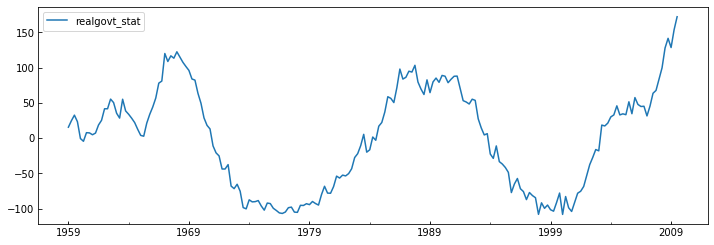

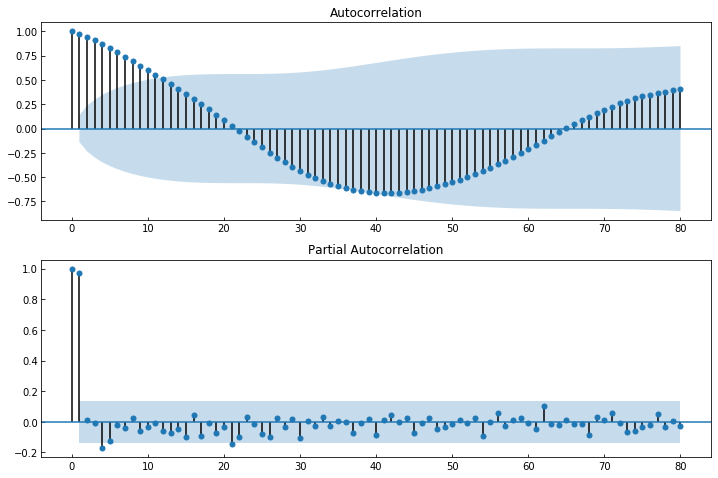

In [114]:
datadiff2[["realgovt_stat"]].plot(figsize=(12,4));
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datadiff2[["realgovt_stat"]].values.squeeze(), lags=80, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datadiff2[["realgovt_stat"]], lags=80, ax=ax2)

In [110]:
datadiff2.head()

,realgovt,realgovt_stat
1959-03-31,470.045,15.410269
1959-06-30,481.301,24.599993
1959-09-30,491.260,32.492717
1959-12-31,484.052,23.218440
1960-03-31,462.199,-0.700836


In [111]:
arma_mod100 = sm.tsa.ARMA(datadiff2[["realgovt"]], (5,0)).fit()
print (sm.stats.durbin_watson(arma_mod100.resid.values))

arma_mod100.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


1.0270245125392259


//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               realgovt   No. Observations:                  203
Model:                     ARMA(5, 0)   Log Likelihood                -799.218
Method:                       css-mle   S.D. of innovations             12.106
Date:                Thu, 29 Nov 2018   AIC                           1612.435
Time:                        08:30:54   BIC                           1635.628
Sample:                    03-31-1959   HQIC                          1621.818
                         - 09-30-2009                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2018.9996        nan        nan        nan         nan         nan
ar.L1.realgovt     0.9541      0.002    474.158      0.000       0.950       0.958
ar.L2.realgovt     0.1423        nan        nan        nan         nan         nan
ar.L3.realgovt     0.1549        nan        nan        nan         nan         nan
ar.L4.realgovt     0.0274      0.014      1.997      0.047       0.001       0.054
ar.L5.realgovt    -0.2788        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0003           -0.0000j            1.0003           -0.0000
AR.2            1.1686           -0.0000j            1.1686           -0.0000
AR.3           -0.2558           -1.3796j            1.4031           -0.2792
AR.4           -0.2558           +1.3796j            1.4031            0.2792
AR.5           -1.5589           -0.0000j            1.5589           -0.5000
-----------------------------------------------------------------------------
"""

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'ARIMA (10,1,1)')

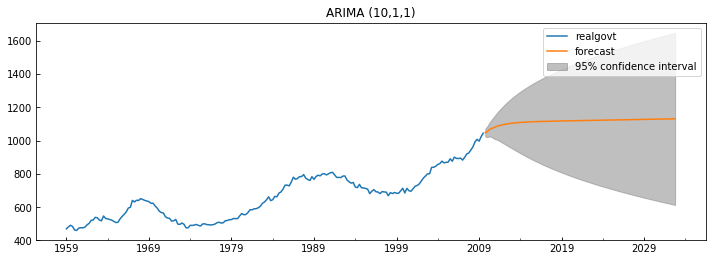

In [115]:
ax = datadiff2[["realgovt"]].plot(figsize=(12,4));
arma_mod100.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARIMA (10,1,1)")



# ARIMA 

## PLAYING WITH PARAMETERS

In [118]:
data = sm.datasets.macrodata.load_pandas().data

datadiff3=data[['year', 'realgovt']]
datadiff3.index = pd.Index(sm.tsa.datetools.dates_from_range('1959q1', '2009q3'))

del datadiff3['year']

arima_mod110 = sm.tsa.ARIMA(datadiff3, (10,1,0)).fit()
print ("ARIMA 10,1,0", sm.stats.durbin_watson(arima_mod110.resid.values))

arima_mod110.summary()

arima_mod311 = sm.tsa.ARIMA(datadiff3, (3,1,1)).fit()
print ("ARIMA 3,1,0", sm.stats.durbin_watson(arima_mod311.resid.values))

arima_mod311.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


ARIMA 10,1,0 1.9872021161769733
ARIMA 3,1,0 2.0221640522250777


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.realgovt   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -790.142
Method:                       css-mle   S.D. of innovations             12.080
Date:                Thu, 29 Nov 2018   AIC                           1592.283
Time:                        08:31:58   BIC                           1612.133
Sample:                    06-30-1959   HQIC                          1600.314
                         - 09-30-2009                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.1550      2.020      1.562      0.120      -0.805       7.115
ar.L1.D.realgovt     0.5225      0.122      4.277      0.000       0.283       0.762
ar.L2.D.realgovt     0.0958      0.078      1.230      0.220      -0.057       0.248
ar.L3.D.realgovt     0.2144      0.078      2.754      0.006       0.062       0.367
ma.L1.D.realgovt    -0.5911      0.109     -5.406      0.000      -0.805      -0.377
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1157           -0.0000j            1.1157           -0.0000
AR.2           -0.7812           -1.8894j            2.0445           -0.3124
AR.3           -0.7812           +1.8894j            2.0445            0.3124
MA.1            1.6918           +0.0000j            1.6918            0.0000
-----------------------------------------------------------------------------
"""

# remove trend and use ARMA

In [119]:
datadiff2.head()

,realgovt,realgovt_stat
1959-03-31,470.045,15.410269
1959-06-30,481.301,24.599993
1959-09-30,491.260,32.492717
1959-12-31,484.052,23.218440
1960-03-31,462.199,-0.700836


In [122]:
arma_mod51 = sm.tsa.ARMA(datadiff2[['realgovt_stat']], (5,1)).fit()
print (sm.stats.durbin_watson(arma_mod51.resid.values))
arma_mod51.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1.975576378634004


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          realgovt_stat   No. Observations:                  203
Model:                     ARMA(5, 1)   Log Likelihood                -791.329
Method:                       css-mle   S.D. of innovations             11.800
Date:                Thu, 29 Nov 2018   AIC                           1598.659
Time:                        08:32:26   BIC                           1625.164
Sample:                    03-31-1959   HQIC                          1609.382
                         - 09-30-2009                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  14.5340     27.235      0.534      0.594     -38.845      67.913
ar.L1.realgovt_stat     1.3135      0.183      7.191      0.000       0.955       1.671
ar.L2.realgovt_stat    -0.2441      0.200     -1.218      0.225      -0.637       0.149
ar.L3.realgovt_stat     0.1147      0.119      0.960      0.338      -0.119       0.349
ar.L4.realgovt_stat    -0.0102      0.125     -0.081      0.935      -0.255       0.235
ar.L5.realgovt_stat    -0.1910      0.095     -2.003      0.047      -0.378      -0.004
ma.L1.realgovt_stat    -0.4292      0.179     -2.393      0.018      -0.781      -0.078
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0464           -0.0790j            1.0494           -0.0120
AR.2            1.0464           +0.0790j            1.0494            0.0120
AR.3           -0.0931           -1.5545j            1.5573           -0.2595
AR.4           -0.0931           +1.5545j            1.5573            0.2595
AR.5           -1.9599           -0.0000j            1.9599           -0.5000
MA.1            2.3297           +0.0000j            2.3297            0.0000
-----------------------------------------------------------------------------
"""

In [123]:
## arma_mod20 = sm.tsa.ARMA(datadiff, (3,0)).fit()
print (sm.stats.durbin_watson(arma_mod20.resid.values))

arma_mod20.summary()

2.0158098506421065


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  unemp   No. Observations:                  203
Model:                     ARMA(2, 1)   Log Likelihood                  -9.872
Method:                       css-mle   S.D. of innovations              0.251
Date:                Thu, 29 Nov 2018   AIC                             29.745
Time:                        08:32:27   BIC                             46.311
Sample:                    03-31-1959   HQIC                            36.447
                         - 09-30-2009                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.0872      0.435     13.990      0.000       5.234       6.940
ar.L1.unemp     1.5822      0.086     18.303      0.000       1.413       1.752
ar.L2.unemp    -0.6265      0.086     -7.295      0.000      -0.795      -0.458
ma.L1.unemp     0.1188      0.115      1.032      0.303      -0.107       0.344
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2627           -0.0412j            1.2634           -0.0052
AR.2            1.2627           +0.0412j            1.2634            0.0052
MA.1           -8.4166           +0.0000j            8.4166            0.5000
-----------------------------------------------------------------------------
"""

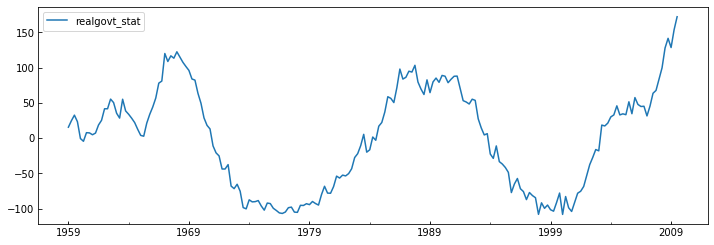

In [126]:
datadiff2[['realgovt_stat']].plot(figsize=(12,4));

//anaconda/envs/GEOP/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


Text(0.5, 1.0, 'ARMA (5,1)')

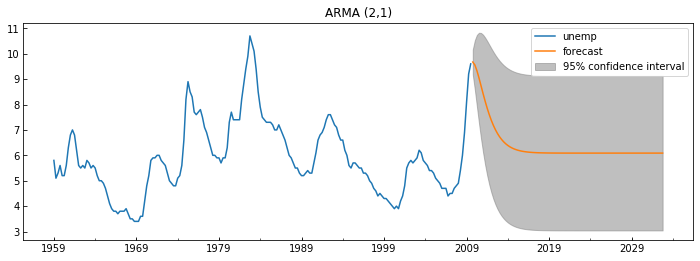

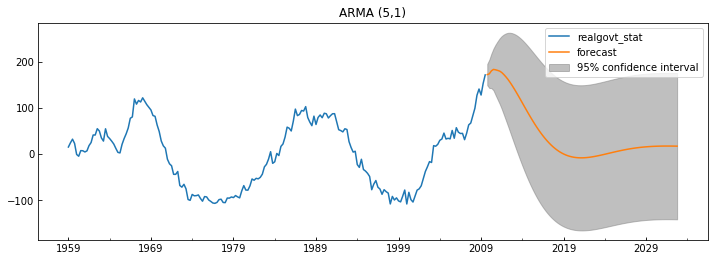

In [128]:
ax = datadiff.plot(figsize=(12,4));
arma_mod20.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARMA (2,1)")
ax = datadiff2[['realgovt_stat']].plot(figsize=(12,4));
arma_mod51.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARMA (5,1)")


# OR NOT REMOVING TRENDS AND USING ARIMA

In [ ]:
ax = datadiff3.plot(figsize=(12,4));
arima_mod110.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARIMA (10,1,1)")

ax = datadiff3.plot(figsize=(12,4));
arima_mod311.plot_predict('2009', '2032', dynamic=True, ax=ax, plot_insample=False)
ax.set_title("ARIMA (3,1,1)")
